In [2]:
import numpy as np
import matplotlib.pyplot as plt
from regions import Regions
import regions
from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy import units as u
import reproject
from reproject.mosaicking import find_optimal_celestial_wcs

from smart_plotters.jwst_plots import JWSTCatalog, make_cat_use, make_brick_cat
from smart_plotters.cutout_plot import get_cutout_405, get_cutout_jwst_ice
from smart_plotters import cmd_plot

from dust_extinction.averages import CT06_MWLoc, I05_MWAvg, CT06_MWGC, G21_MWAvg, RL85_MWGC, RRP89_MWGC, F11_MWGC

In [3]:
reg_edge = Regions.read('/orange/adamginsburg/jwst/cloudc/regions_/cloudd_edge.reg')
reg_left = Regions.read('/orange/adamginsburg/jwst/cloudc/regions_/leftmost.reg')
reg_center = Regions.read('/orange/adamginsburg/jwst/cloudc/regions_/cloudd_center.reg')

In [4]:
pos = SkyCoord('17:46:22.7004243086 -28:32:52.3581961071', unit=(u.hourangle, u.deg), frame='icrs')
w = 3.6*u.arcmin
l = 2.4*u.arcmin

cutout = get_cutout_405(pos, w, l)

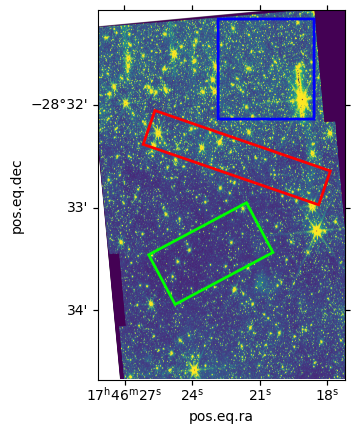

In [6]:
ax = plt.subplot(projection=cutout.wcs)
plt.imshow(cutout.data, vmin=0, vmax=50)
reg_edge[0].to_pixel(cutout.wcs).plot(ax=ax, edgecolor='red', facecolor='none', lw=2)
reg_left[0].to_pixel(cutout.wcs).plot(ax=ax, edgecolor='blue', facecolor='none', lw=2)
reg_center[0].to_pixel(cutout.wcs).plot(ax=ax, edgecolor='lime', facecolor='none', lw=2)

In [23]:
cat_use = make_cat_use()
cat_use.catalog['Av'] = cat_use.get_Av('f182m', 'f212n')

In [8]:
cat_edge = JWSTCatalog(cat_use.table_region_mask(reg_edge, cutout.wcs))
cat_left = JWSTCatalog(cat_use.table_region_mask(reg_left, cutout.wcs))
cat_center = JWSTCatalog(cat_use.table_region_mask(reg_center, cutout.wcs))

In [9]:
x = np.linspace(0, 30, 100)
pt1 = (0.6, 15)
pt2 = (1., 17.5)
y = (pt2[1] - pt1[1]) / (pt2[0] - pt1[0]) * (x - pt1[0]) + pt1[1]

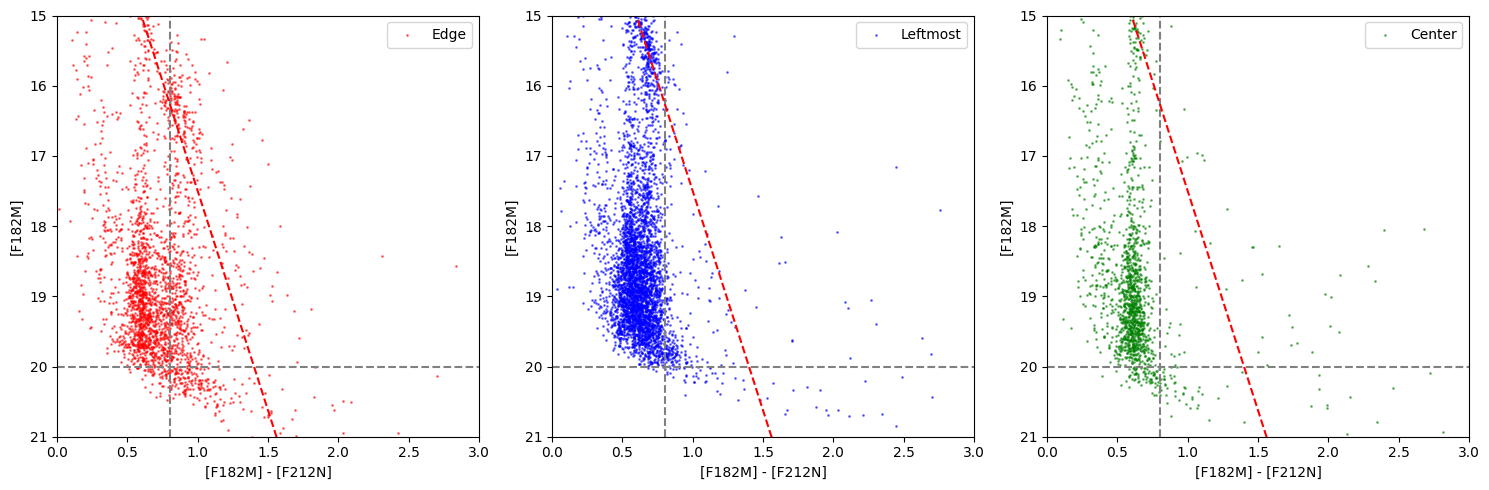

In [10]:
fig = plt.figure(figsize=(15,5))

ax = plt.subplot(131)
cat_edge.plot_CMD('f182m', 'f212n', 'f182m', ax=ax, s=1, alpha=0.5, color='r', label='Edge')
ax.set_xlim(0, 3)
ax.set_ylim(21, 15)
ax.axhline(20, color='gray', ls='--')
ax.axvline(0.8, color='gray', ls='--')
ax.plot(x, y, color='red', ls='--')
plt.legend()

ax2 = plt.subplot(132)
cat_left.plot_CMD('f182m', 'f212n', 'f182m', ax=ax2, s=1, alpha=0.5, color='b', label='Leftmost')
ax2.set_xlim(0, 3)
ax2.set_ylim(21, 15)
ax2.axhline(20, color='gray', ls='--')
ax2.axvline(0.8, color='gray', ls='--')
ax2.plot(x, y, color='red', ls='--')
plt.legend()

ax3 = plt.subplot(133)
cat_center.plot_CMD('f182m', 'f212n', 'f182m', ax=ax3, s=1, alpha=0.5, color='g', label='Center')
ax3.set_xlim(0, 3)
ax3.set_ylim(21, 15)
ax3.axhline(20, color='gray', ls='--')
ax3.axvline(0.8, color='gray', ls='--')
ax3.plot(x, y, color='red', ls='--')
plt.legend()

plt.tight_layout()

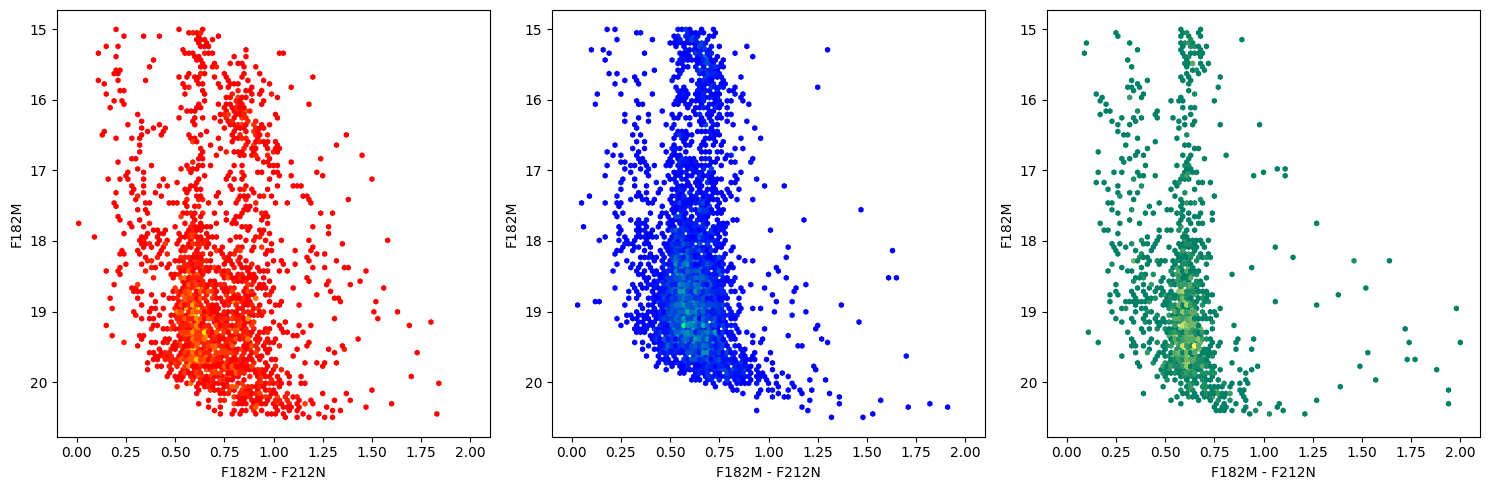

In [12]:
fig = plt.figure(figsize=(15,5))

ax = plt.subplot(131)
ax.hexbin(cat_edge.color('f182m', 'f212n'), cat_edge.band('f182m'), extent=(0, 2, 15, 20.5), mincnt=1, bins=100, cmap='autumn')
plt.gca().invert_yaxis()
ax.set_xlabel('F182M - F212N')
ax.set_ylabel('F182M')

ax = plt.subplot(132)
ax.hexbin(cat_left.color('f182m', 'f212n'), cat_left.band('f182m'), extent=(0, 2, 15, 20.5), mincnt=1, bins=100, cmap='winter')
plt.gca().invert_yaxis()
ax.set_xlabel('F182M - F212N')
ax.set_ylabel('F182M')

ax = plt.subplot(133)
ax.hexbin(cat_center.color('f182m', 'f212n'), cat_center.band('f182m'), extent=(0, 2, 15, 20.5), mincnt=1, bins=100, cmap='summer')
plt.gca().invert_yaxis()
ax.set_xlabel('F182M - F212N')
ax.set_ylabel('F182M')

plt.tight_layout()

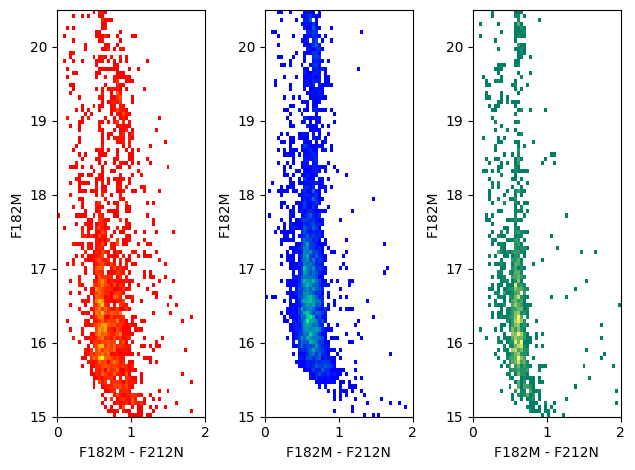

In [14]:
#fig = plt.figure(figsize=(15,5))

ax = plt.subplot(131)
h, xedges, yedges = np.histogram2d(cat_edge.color('f182m', 'f212n'), cat_edge.band('f182m'), range=[[0, 2], [15, 20.5]], bins=(50, 100))
h[h==0] = np.nan
plt.imshow(h.T, interpolation='None', cmap='autumn', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
ax.set_xlabel('F182M - F212N')
ax.set_ylabel('F182M')

ax = plt.subplot(132)
h, xedges, yedges = np.histogram2d(cat_left.color('f182m', 'f212n'), cat_left.band('f182m'), range=[[0, 2], [15, 20.5]], bins=(50, 100))
h[h==0] = np.nan
plt.imshow(h.T, interpolation='None', cmap='winter', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
ax.set_xlabel('F182M - F212N')
ax.set_ylabel('F182M')

ax = plt.subplot(133)
h, xedges, yedges = np.histogram2d(cat_center.color('f182m', 'f212n'), cat_center.band('f182m'), range=[[0, 2], [15, 20.5]], bins=(50, 100))
h[h==0] = np.nan
plt.imshow(h.T, interpolation='None', cmap='summer', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
ax.set_xlabel('F182M - F212N')
ax.set_ylabel('F182M')

plt.tight_layout()

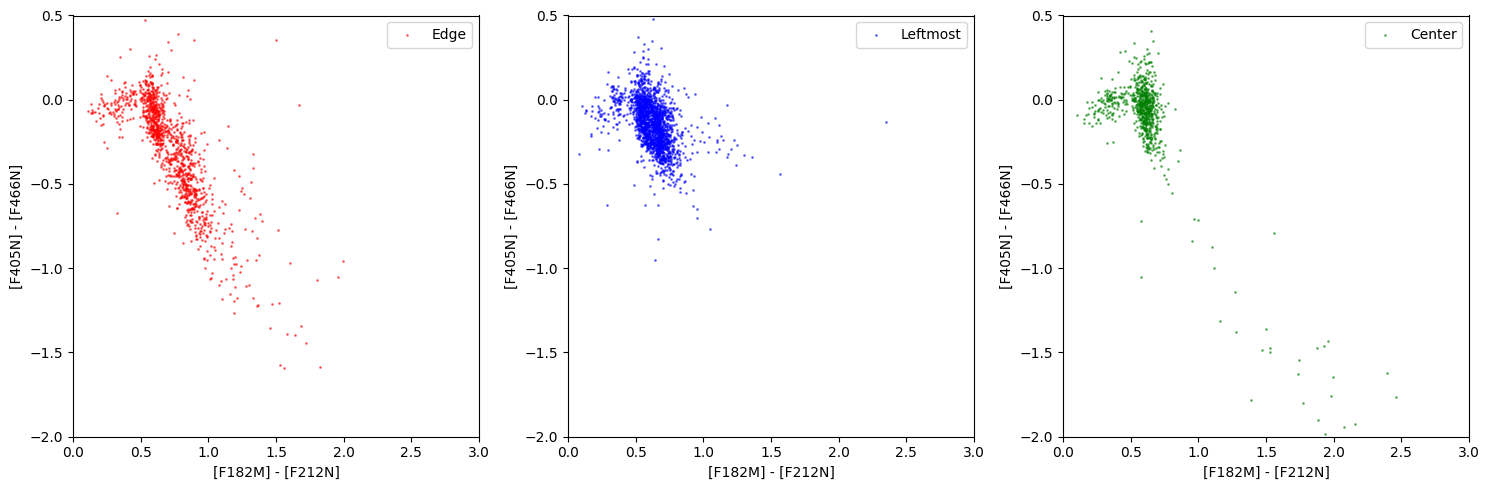

In [22]:
fig = plt.figure(figsize=(15,5))

ax = plt.subplot(131)
cat_edge.plot_CCD('f182m', 'f212n', 'f405n', 'f466n', ax=ax, s=1, alpha=0.5, color='r', label='Edge')
ax.set_xlim(0, 3)
ax.set_ylim(-2, 0.5)
plt.legend()

ax2 = plt.subplot(132)
cat_left.plot_CCD('f182m', 'f212n', 'f405n', 'f466n', ax=ax2, s=1, alpha=0.5, color='b', label='Leftmost')
ax2.set_xlim(0, 3)
ax2.set_ylim(-2, 0.5)
plt.legend()

ax3 = plt.subplot(133)
cat_center.plot_CCD('f182m', 'f212n', 'f405n', 'f466n', ax=ax3, s=1, alpha=0.5, color='g', label='Center')
ax3.set_xlim(0, 3)
ax3.set_ylim(-2, 0.5)
plt.legend()

plt.tight_layout()

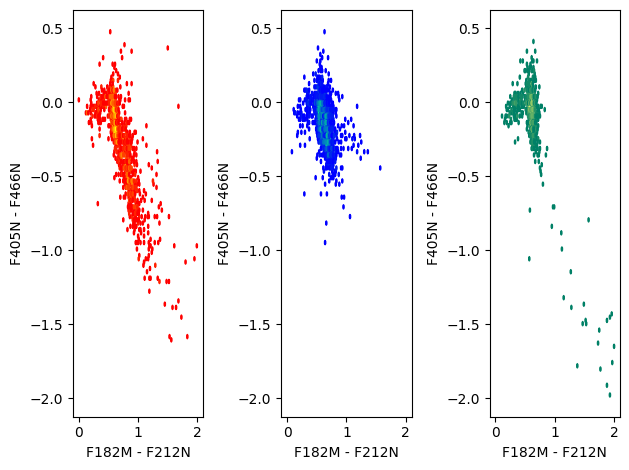

In [19]:
ax = plt.subplot(131)
ax.hexbin(cat_edge.color('f182m', 'f212n'), cat_edge.color('f405n', 'f466n'), extent=(0, 2, -2, 0.5), mincnt=1, bins=100, cmap='autumn')
ax.set_xlabel('F182M - F212N')
ax.set_ylabel('F405N - F466N')

ax = plt.subplot(132)
ax.hexbin(cat_left.color('f182m', 'f212n'), cat_left.color('f405n', 'f466n'), extent=(0, 2, -2, 0.5), mincnt=1, bins=100, cmap='winter')
ax.set_xlabel('F182M - F212N')
ax.set_ylabel('F405N - F466N')

ax = plt.subplot(133)
ax.hexbin(cat_center.color('f182m', 'f212n'), cat_center.color('f405n', 'f466n'), extent=(0, 2, -2, 0.5), mincnt=1, bins=100, cmap='summer')
ax.set_xlabel('F182M - F212N')
ax.set_ylabel('F405N - F466N')

plt.tight_layout()

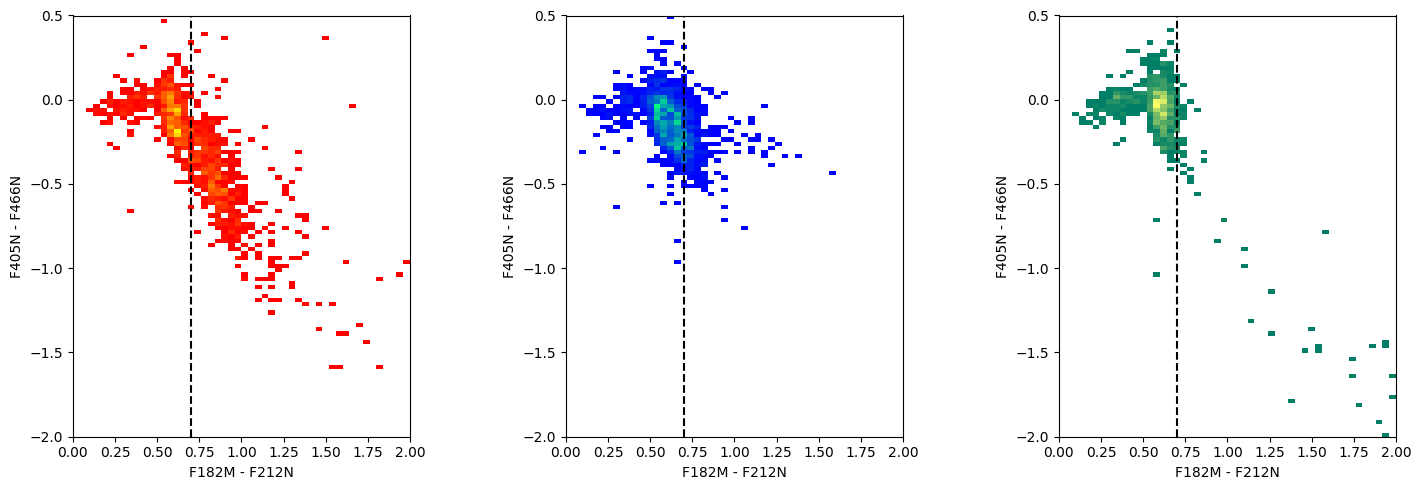

In [21]:
fig = plt.figure(figsize=(15,5))

ax = plt.subplot(131)
h, xedges, yedges = np.histogram2d(cat_edge.color('f182m', 'f212n'), cat_edge.color('f405n', 'f466n'), range=[[0, 2], [-2, 0.5]], bins=(50, 100))
h[h==0] = np.nan
plt.imshow(np.flip(h.T, axis=0), interpolation='None', cmap='autumn', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
ax.set_xlabel('F182M - F212N')
ax.set_ylabel('F405N - F466N')
ax.axvline(0.7, color='k', linestyle='--')

ax = plt.subplot(132)
h, xedges, yedges = np.histogram2d(cat_left.color('f182m', 'f212n'), cat_left.color('f405n', 'f466n'), range=[[0, 2], [-2, 0.5]], bins=(50, 100))
h[h==0] = np.nan
plt.imshow(np.flip(h.T, axis=0), interpolation='None', cmap='winter', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
ax.set_xlabel('F182M - F212N')
ax.set_ylabel('F405N - F466N')
ax.axvline(0.7, color='k', linestyle='--')

ax = plt.subplot(133)
h, xedges, yedges = np.histogram2d(cat_center.color('f182m', 'f212n'), cat_center.color('f405n', 'f466n'), range=[[0, 2], [-2, 0.5]], bins=(50, 100))
h[h==0] = np.nan
plt.imshow(np.flip(h.T, axis=0), interpolation='None', cmap='summer', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
ax.set_xlabel('F182M - F212N')
ax.set_ylabel('F405N - F466N')
ax.axvline(0.7, color='k', linestyle='--')

plt.tight_layout()